In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import random
import matplotlib.pyplot as plt

In [2]:
data_original = pd.read_csv('add.csv')
data_original.head()


C:\Users\DEVASHISH\AppData\Local\Temp\ipykernel_28524\3167577387.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data_original = pd.read_csv('add.csv')


,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
0,0,125,125,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,1,57,468,8.2105,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,2,33,230,6.9696,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,3,60,468,7.8,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,4,60,468,7.8,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.


In [3]:
data_select = data_original[['0', '1', '2', '1558']]
data_select.head()


,0,1,2,1558
0,125,125,1,ad.
1,57,468,8.2105,ad.
2,33,230,6.9696,ad.
3,60,468,7.8,ad.
4,60,468,7.8,ad.


In [5]:
data_select = data_select[data_select['0'].notna()]
data_select = data_select[data_select['1'].notna()]
data_select = data_select[data_select['2'].notna()]
data_select = data_select[data_select['1558'].notna()]

In [6]:
data_select['0'] = pd.to_numeric(data_select['0'], errors = 'coerce')
data_select['1'] = pd.to_numeric(data_select['1'], errors = 'coerce')
data_select['2'] = pd.to_numeric(data_select['2'], errors = 'coerce')
data_select[['1558']] = data_select[['1558']].astype('string')

In [9]:
data_select.groupby('1558').count()

,0,1,2
1558,,,
0.0,1990,1992,1983
1.0,386,386,386


In [10]:
data_select['1558'] = np.where(data_select['1558'] == 'ad.', 1, 0)
data_select['1558'] = data_select['1558'].astype(float)

In [11]:
data_select = data_select.dropna()

In [12]:
data_select.columns = ['height', 'width', 'aspect_ratio', 'category']

In [13]:
random.seed(1)
data_select = shuffle(data_select)

train_set, test_set = train_test_split(data_select, train_size=1895, test_size=(2369-1895))

X_train = train_set[['height', 'width', 'aspect_ratio']]
Y_train = train_set[['category']]

X_test = test_set[['height', 'width', 'aspect_ratio']]
Y_test = test_set[['category']]

X_train = X_train.T
Y_train = Y_train.T
X_test = X_test.T
Y_test = Y_test.T

In [14]:
X_train = X_train.to_numpy()
Y_train = Y_train.to_numpy()
X_test = X_test.to_numpy()
Y_test = Y_test.to_numpy()

In [16]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [19]:
print("sigmoid([0, 2]) = " + str(sigmoid(np.array([0, 2]))))
sigmoid([0, 2]) = [0.5        0.88079708]

SyntaxError: cannot assign to function call (697280683.py, line 2)

In [33]:
def initialise_with_zeros(dim):
     w = np.zeros(shape=(dim, 1))
     b = 0
     assert(w.shape == (dim, 1))
     assert(isinstance(b, float) or isinstance(b, int))
    
     return w, b   

In [35]:
def initialise_with_zeros(dim):
    w = np.zeros((dim, 1))
    b = 0
    return w, b

dim = 3
w, b = initialise_with_zeros(dim)

print("w = " + str(w))
print("b =", b)

w = [[0.]
 [0.]
 [0.]]
b = 0


In [38]:
def propagate(w, b, X, Y):
    m = X.shape[1]
    A = sigmoid(np.dot(w.T, X) + b)
    
    # Compute cost
    cost = (-1/m) * np.sum(Y * np.log(A) + (1-Y) * np.log(1-A))
    
    # Backward propagation
    dw = (1/m) * np.dot(X, (A - Y).T)
    db = (1/m) * np.sum(A - Y)
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    grads = {
        "dw" : dw,
        "db" : db
    }

    return grads, cost

In [40]:
w, b, X, Y = np.array([[1.], [2.], [1.2]]), 2., X_train, Y_train
grads, cost = propagate(w, b, X, Y)
cost.shape
cost

C:\Users\DEVASHISH\AppData\Local\Temp\ipykernel_28524\2396889674.py:6: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * np.sum(Y * np.log(A) + (1-Y) * np.log(1-A))


inf

In [54]:
def optimise(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    # Update parameters w and b using gradient descent
    # Arguments:
    # w - weights, a numpy array of size (num_px, 1)
    # b - bias, a scalar
    # X - data of shape (num_px, number of examples m)
    # Y - true "label" vector of shape (1, number of examples m)
    # num_iterations - number of iterations of the optimization loop
    # learning_rate - learning rate of the gradient descent update rule
    # print_cost - True to print the loss every 100 iterations
    costs = []
    
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)
        
        # Retrieve derivatives
        dw = grads["dw"]
        db = grads["db"]
        
        # Update rule
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        if i % 100 == 0:
            costs.append(cost)
            
        # Print the costs after every 100 iterations
        if print_cost and i % 100 == 0:
            print("Cost after iteration %i: %f" %(i, cost))
            
    params = {
        "w": w,
        "b": b
    }
    
    grads = {
        "dw": dw,
        "db": db
    }
        
    return params, grads, costs

In [55]:
params, grads, costs = optimise(w, b, X, Y, num_iterations = 1000, learning_rate = 0.009, print_cost = True)
print("w: " + str(params["w"]))
print("b: " + str(params["b"]))
print("dw: " + str(grads["dw"]))
print("db: " + str(grads["db"]))

Cost after iteration 0: inf
Cost after iteration 100: 0.002014
Cost after iteration 200: 0.002009
Cost after iteration 300: 0.002004
Cost after iteration 400: 0.001999
Cost after iteration 500: 0.001994
Cost after iteration 600: 0.001990
Cost after iteration 700: 0.001985
Cost after iteration 800: 0.001980
Cost after iteration 900: 0.001975
w: [[-0.1578925 ]
 [-0.78957933]
 [ 1.12226144]]
b: 1.974015371240408
dw: [[0.00135498]
 [0.0013465 ]
 [0.00088353]]
db: 0.0008840253330065396


C:\Users\DEVASHISH\AppData\Local\Temp\ipykernel_28524\2396889674.py:6: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * np.sum(Y * np.log(A) + (1-Y) * np.log(1-A))


In [56]:
def predict(w, b, X):
    # Predict whether label is 0 or 1 using logistic regression via parameters w and b
    # Arguments:
    # w - weights, a numpy array of size (num_px, 1)
    # b - bias, a scalar
    # X - data, a numpy array of shape (num_px, number of examples m)
    # Returns:
    # Y_prediction - predicted labels 0 or 1, a numpy array of shape (1, number of examples m)
    m = X.shape[1]
    Y_prediction = np.zeros(shape = (1, m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector A to derive probabilities between 0 and 1 of image being ad or not
    A = sigmoid(np.dot(w.T,X) + b)
    
    for i in range(A.shape[1]):
        if A[0,i] <= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1
    
    assert(Y_prediction.shape == (1,m))
    
    return Y_prediction

In [58]:
def predict(w, b, X):
    # Compute the predictions based on weights (w), bias (b), and input data (X)
    # Arguments:
    # w - weights, a numpy array of size (num_px, 1)
    # b - bias, a scalar
    # X - data of shape (num_px, number of examples m)
    
    m = X.shape[1]  # Number of examples
    Y_predictions = np.zeros((1, m))  # Initialize predictions array
    
    # Compute activation values and make predictions
    A = sigmoid(np.dot(w.T, X) + b)
    Y_predictions[A > 0.5] = 1
    
    return Y_predictions

# Example usage:
w = np.array([[0.1124579], [0.23106775]])
b = -0.3
X = np.array([[1., -1.1, -3.2], [1.2, 2., 0.1]])

print("predictions: " + str(predict(w, b, X)))

predictions: [[1. 1. 0.]]


In [61]:
# model()
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.01, print_cost = False):
    # Builds the logistic regression model based on the helper functions created above
    # Arguments:
    # X_train - train set, numpy array of size (num_px, number of examples m)
    # Y_train - train label vector, numpy array of size (1, number of examples m)
    # X_test - test set, numpy array of size (num_px, number of examples m)
    # Y_test - test label vector, numpy array of size (1, number of examples m)
    # num_iterations - a scalar
    # learning_rate - a scalar
    # print_cost - True to print cost for every 100 iterations
    # Returns:
    # d - dictionary of costs, predictions, and parameters w and b, learning rate and number of iterations
    
    # Initialise parameters w and b with zeros
    w, b = initialise_with_zeros(X_train.shape[0])
    
    # Gradient descent
    parameters, grads, costs = optimise(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict train and test sets
    Y_prediction_train = predict(w, b, X_train)
    Y_prediction_test = predict(w, b, X_test)
    
    # Print train and test set errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    
    d = {
        "costs": costs,
        "Y_prediction_train": Y_prediction_train,
        "Y_prediction_test": Y_prediction_test,
        "w": w,
        "b": b,
        "learning_rate": learning_rate,
        "num_iterations": num_iterations
    }
    
    return d

In [62]:
d = model(X_train, Y_train, X_test, Y_test, num_iterations = 3000, learning_rate = 0.0001, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.035014
Cost after iteration 200: 0.024450
Cost after iteration 300: 0.019754
Cost after iteration 400: 0.016932
Cost after iteration 500: 0.014991
Cost after iteration 600: 0.013550
Cost after iteration 700: 0.012424
Cost after iteration 800: 0.011513
Cost after iteration 900: 0.010756
Cost after iteration 1000: 0.010115
Cost after iteration 1100: 0.009563
Cost after iteration 1200: 0.009081
Cost after iteration 1300: 0.008656
Cost after iteration 1400: 0.008278
Cost after iteration 1500: 0.007938
Cost after iteration 1600: 0.007631
Cost after iteration 1700: 0.007352
Cost after iteration 1800: 0.007097
Cost after iteration 1900: 0.006863
Cost after iteration 2000: 0.006647
Cost after iteration 2100: 0.006448
Cost after iteration 2200: 0.006262
Cost after iteration 2300: 0.006089
Cost after iteration 2400: 0.005928
Cost after iteration 2500: 0.005776
Cost after iteration 2600: 0.005634
Cost after iteration 2700: 0.005500
Cost

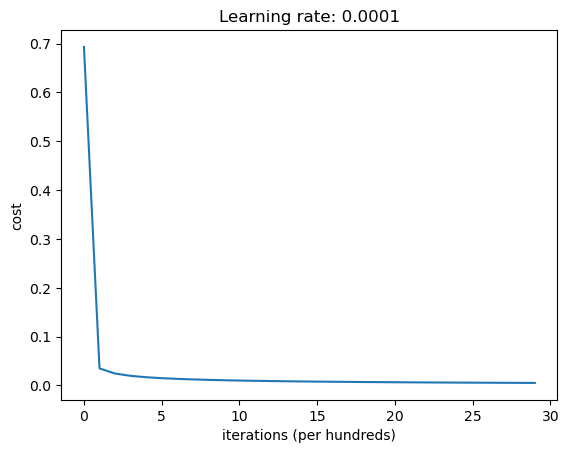

In [63]:
costs = np.squeeze(d["costs"])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate: " + str(d["learning_rate"]))
plt.show()